# PCA for 6 and 10 components

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [120]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_2_instances_valid_fingers.csv')

df_or = df_10_10inst.set_index(["videoname", "n_frame", "n_landmark"])[["x", "y"]].stack().reset_index()
df_or
df_or.rename(columns={"level_3": "axis", 0: "coordinate"}, inplace=True)

df_10_10inst = df_or

intersection = ['abuelo',
       'aceptar', 'adentro', 'agrupar', 'agua', 'ahora', 'ahí', 'alegría',
       'amarrar', 'ambiente', 'amigo', 'animales', 'antes', 'aprender',
       'aproximadamente', 'aquí', 'beneficio', 'bien', 'botar', 'brotar',
       'buen', 'cada uno', 'cambiar', 'carne', 'casa', 'colores', 'comer',
       'conocer', 'contento', 'continuar', 'controlar', 'crecer',
       'cuaderno', 'cuerpo', 'cuánto', 'cuántos', 'cómo', 'decir',
       'dejar', 'dentro', 'diariamente', 'dibujar', 'diferente',
       'diferentes', 'dos', 'día', 'edad', 'ejercicios', 'ella', 'ellos',
       'emoción', 'empezar', 'enojar', 'entender', 'entonces', 'escribir',
       'ese', 'familia', 'feliz', 'fortalecer', 'frijol', 'fuerte',
       'fácil', 'grasa', 'guardar', 'gustar', 'habitación', 'hacer',
       'hermano', 'hola', 'hoy', 'idea', 'importante', 'interesante',
       'ira', 'jugar', 'juntos', 'llamar', 'mal', 'ministerio',
       'más o menos', 'necesitar', 'niños', 'no', 'nombre', 'nosotros',
       'o', 'objetivo', 'paciencia', 'papá', 'pensar', 'pero', 'planta',
       'poder', 'porcentaje', 'porción', 'preguntar', 'preguntas',
       'primaria', 'primo', 'probar', 'proceso', 'profesor', 'proteína',
       'proteínas', 'que', 'quinto', 'qué', 'razón', 'recordar',
       'relación', 'salud', 'saludable', 'seco', 'seguro', 'seleccionar',
       'semana', 'sentir', 'ser', 'sexto', 'solo', 'sí', 'también',
       'tener', 'tiempo', 'todo', 'tú', 'uno', 'usar', 'ustedes', 'vaca',
       'valor', 'venir', 'ver', 'ya', 'yo', 'él']
	   
len(intersection)


137

In [121]:

df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
df_10_10inst

#SAVE IT
correct_classes = df_10_10inst[df_10_10inst["classes"].isin(intersection) ]

df_10_10inst = correct_classes

x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))


['abuelo_262' 'abuelo_266' 'abuelo_30' 'aceptar_185' 'aceptar_66'
 'ahora_243' 'ahora_246' 'ahora_74' 'ahí_101' 'ahí_151' 'ahí_231'
 'alegría_254' 'alegría_289' 'ambiente_203' 'amigo_105' 'amigo_171'
 'antes_114' 'antes_248' 'antes_283' 'antes_41' 'aprender_175'
 'aprender_195' 'aprender_217' 'aprender_282' 'aquí_19' 'bien_241'
 'bien_244' 'bien_278' 'bien_39' 'cambiar_50' 'casa_256' 'casa_9'
 'controlar_176' 'controlar_178' 'crecer_136' 'cuerpo_51' 'cómo_223'
 'cómo_44' 'cómo_85' 'decir_138' 'decir_265' 'dejar_129' 'dejar_131'
 'dentro_55' 'dos_280' 'día_261' 'edad_60' 'emoción_143' 'emoción_145'
 'emoción_249' 'emoción_250' 'emoción_281' 'emoción_43' 'emoción_45'
 'emoción_93' 'enojar_102' 'enojar_107' 'enojar_124' 'entender_137'
 'entender_141' 'familia_204' 'feliz_274' 'habitación_267' 'hermano_100'
 'hermano_116' 'hermano_150' 'hermano_169' 'hola_0' 'hoy_221' 'idea_10'
 'ira_290' 'jugar_130' 'jugar_98' 'juntos_36' 'ministerio_11'
 'más o menos_61' 'necesitar_147' 'nosotros_183' 'n

In [122]:
df_10_10inst['n_frame'].unique

<bound method Series.unique of 1300       0
1301       0
1302       0
1303       0
1304       0
          ..
548595    12
548596    12
548597    12
548598    12
548599    12
Name: n_frame, Length: 535600, dtype: int64>

In [123]:
#videoname_to_drop

In [124]:
#df_10_10inst['videoname'].head()

In [125]:
#verify the type 
#type(df_10_10inst['videoname'][0])

In [126]:
#verify the type 
#type(videoname_to_drop[0])

In [127]:
'''
for i in range (0,225000):
    if (df_10_10inst['videoname'][i] in videoname_to_drop) :
        print (i)
        df_10_10inst.drop([i], axis=0, inplace=True)
'''

"\nfor i in range (0,225000):\n    if (df_10_10inst['videoname'][i] in videoname_to_drop) :\n        print (i)\n        df_10_10inst.drop([i], axis=0, inplace=True)\n"

In [128]:
'''
for i in range len(df_10_10inst):
    if (df_10_10inst['videoname'][i] in videoname_to_drop) :
        df_10_10inst.drop([i], axis=0, inplace=True)
'''

"\nfor i in range len(df_10_10inst):\n    if (df_10_10inst['videoname'][i] in videoname_to_drop) :\n        df_10_10inst.drop([i], axis=0, inplace=True)\n"

In [129]:
#df_10_10inst.drop([i], axis=0, inplace=True)

In [130]:
#df_10_10inst_NEW = df_10_10inst

In [131]:
#df_10_10inst.to_csv("data_10_frames_10_instances_removed.csv")

In [132]:
'''este no va
for i in range(23,33):
    df_10_10inst.drop(df_10_10inst[df_10_10inst.n_landmark == i].index, inplace=True)
df_10_10inst.head()
'''

'este no va\nfor i in range(23,33):\n    df_10_10inst.drop(df_10_10inst[df_10_10inst.n_landmark == i].index, inplace=True)\ndf_10_10inst.head()\n'

In [133]:
'''
df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))
'''

"\ndf_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])\nx_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})\nprint(pd.unique(df_10_10inst['videoname']))\n"

In [134]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
0,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,0.150295,...,0.541816,0.631193,0.459971,0.650785,0.495556,0.650876,0.517939,0.648745,0.537843,0.646697
1,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,0.184704,...,0.491336,0.696006,0.457485,0.709453,0.495792,0.718200,0.492674,0.716951,0.479803,0.713532
2,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,0.182878,...,0.444307,0.581099,0.343946,0.635067,0.358274,0.599841,0.368297,0.576580,0.377824,0.558680
3,0.472934,0.213904,0.503864,0.172804,0.521181,0.170798,0.538423,0.169588,0.451923,0.178839,...,0.370714,0.441884,0.398428,0.448739,0.399006,0.455128,0.385619,0.462124,0.376459,0.465404
4,0.482780,0.184060,0.494463,0.152365,0.503126,0.153298,0.514140,0.153892,0.456795,0.149905,...,0.470907,0.527347,0.380529,0.533886,0.410176,0.537095,0.430455,0.540792,0.447406,0.544144


In [135]:
temp_10_10inst.insert(0,"instance",['abuelo_262','abuelo_266','abuelo_30','aceptar_185','aceptar_66'
,'ahora_243','ahora_246','ahora_74','ahí_101','ahí_151','ahí_231'
,'alegría_254','alegría_289','ambiente_203','amigo_105','amigo_171'
,'antes_114','antes_248','antes_283','antes_41','aprender_175'
,'aprender_195','aprender_217','aprender_282','aquí_19','bien_241'
,'bien_244','bien_278','bien_39','cambiar_50','casa_256','casa_9'
,'controlar_176','controlar_178','crecer_136','cuerpo_51','cómo_223'
,'cómo_44','cómo_85','decir_138','decir_265','dejar_129','dejar_131'
,'dentro_55','dos_280','día_261','edad_60','emoción_143','emoción_145'
,'emoción_249','emoción_250','emoción_281','emoción_43','emoción_45'
,'emoción_93','enojar_102','enojar_107','enojar_124','entender_137'
,'entender_141','familia_204','feliz_274','habitación_267','hermano_100'
,'hermano_116','hermano_150','hermano_169','hola_0','hoy_221','idea_10'
,'ira_290','jugar_130','jugar_98','juntos_36','ministerio_11'
,'más o menos_61','necesitar_147','nosotros_183','no_108','objetivo_208'
,'paciencia_153','paciencia_158','papá_27','preguntar_75','primaria_22'
,'primo_104','profesor_252','que_148','que_190','razón_146','recordar_206'
,'recordar_247','recordar_62','relación_161','seguro_18','seguro_21'
,'seleccionar_222','sentir_187','sexto_24','sí_155','sí_157','sí_159'
,'sí_194','sí_200','sí_228','sí_240','sí_242','sí_251','sí_277','sí_37'
,'sí_76','sí_79','sí_83','tiempo_49','tiempo_91','tú_207','tú_96'
,'uno_260','usar_214','ustedes_239','venir_26','venir_31','yo_119'
,'yo_152','yo_193','yo_3','adentro_150','agrupar_103','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_186','agua_202'
,'agua_399','agua_537','ahora_463','amarrar_181','animales_652','antes_89'
,'aprender_34','aprender__466','aproximadamente_193','aproximadamente_745'
,'aquí_189','aquí_330','beneficio_411','bien_147','bien_16','bien_294'
,'bien_329','bien_337','bien_401','bien_626','botar_205','brotar_117'
,'brotar_136','buen_0','buen_151','cada uno_714','cada uno_748'
,'cambiar_108','cambiar_140','carne_218','carne_326','colores_813'
,'comer_238','comer_248','comer_286','comer_303','comer_309','comer_312'
,'comer_313','comer_323','comer_355','comer_452','comer_477','comer_590'
,'comer_705','comer_709','conocer_79','conocer_83','contento_516'
,'continuar_356','crecer_120','cuaderno_55','cuaderno_810','cuerpo_476'
,'cuerpo_597','cuántos_443','cuántos_620','cuánto_405','cuánto_420'
,'cuánto_445','cuánto_456','cuánto_460','cuánto_468','cuánto_483'
,'cuánto_703','cuánto_706','cuánto_708','cuánto_742','cuánto_744'
,'cómo_230','cómo_379','cómo_427','cómo_9','decir_224','decir_321'
,'decir_433','decir_755','dentro_371','dentro_486','dentro_566'
,'dentro_596','dentro_627','diariamente_402','diariamente_479'
,'dibujar_261','diferentes_471','diferentes_668','diferentes_750'
,'diferente_71','dos_669','dos_682','día_197','ejercicios_726','ella_527'
,'ella_616','ellos_746','ellos_754','ellos_767','ellos_772','empezar_32'
,'entonces_364','entonces_480','escribir_56','escribir_60','escribir_797'
,'ese_143','ese_214','ese_544','ese_719','familia_165','familia_45'
,'familia_75','feliz_15','fortalecer_548','fortalecer_582','frijol_175'
,'frijol_434','fuerte_152','fuerte_314','fuerte_361','fuerte_362'
,'fuerte_363','fuerte_459','fuerte_487','fuerte_584','fuerte_588'
,'fuerte_628','fácil_255','fácil_341','grasa_534','grasa_553','grasa_557'
,'guardar_105','guardar_93','guardar_97','gustar_439','gustar_453'
,'hacer_161','hacer_172','hacer_81','hermano_39','hermano_40','hola_508'
,'hola_632','hoy_521','hoy_540','idea_21','importante_629'
,'importante_636','interesante_113','interesante_610','juntos_517'
,'juntos_519','juntos_618','juntos_621','llamar_46','mal_301','mal_334'
,'mal_336','ministerio_23','más o menos_763','niños_2','niños_736'
,'niños_770','nombre_7','no_289','no_297','no_333','no_462','no_667'
,'o_272','o_722','pensar_213','pensar_378','pensar_461','pensar_61'
,'pensar_613','pensar_641','pensar_753','pero_376','pero_442','pero_611'
,'pero_660','planta_119','planta_159','planta_173','planta_215'
,'planta_217','planta_435','poder_162','poder_645','porcentaje_507'
,'porción_421','porción_425','preguntas_59','primaria_775','primo_38'
,'probar_317','probar_67','proceso_170','proceso_351','profesor_501'
,'profesor_817','proteínas_370','proteínas_572','proteínas_648'
,'proteínas_676','proteínas_694','proteínas_784','proteína_393'
,'quinto_773','qué_212','qué_573','qué__131','razón_658','recordar_169'
,'saludable_227','salud_239','salud_271','salud_345','seco_222'
,'semana_64','sentir_14','sentir_149','sentir_458','sentir_570'
,'sentir_591','ser_226','ser_342','sexto_4','sexto_738','solo_661'
,'sí_278','sí_281','sí_284','sí_291','sí_315','sí_419','sí_565','sí_633'
,'sí_659','sí__228','también_182','también_552','tener_530','todo_320'
,'todo_327','todo_606','tú_229','tú_243','tú_247','tú_263','tú_53'
,'tú_635','tú_711','tú_80','tú_803','uno_674','usar_90','vaca_653'
,'vaca_662','vaca_688','valor_485','valor_764','venir_54','venir_806'
,'venir_818','ver_49','ver_622','ya_115','ya_125','ya_30','ya_35','ya_350'
,'yo_630','él_285','él_524'
],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst.head()

,instance,0,1,2,3,4,5,6,7,8,...,1291,1292,1293,1294,1295,1296,1297,1298,1299,classes
0,abuelo_262,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,...,0.631193,0.459971,0.650785,0.495556,0.650876,0.517939,0.648745,0.537843,0.646697,abuelo
1,abuelo_266,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,...,0.696006,0.457485,0.709453,0.495792,0.718200,0.492674,0.716951,0.479803,0.713532,abuelo
2,abuelo_30,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,...,0.581099,0.343946,0.635067,0.358274,0.599841,0.368297,0.576580,0.377824,0.558680,abuelo
3,aceptar_185,0.472934,0.213904,0.503864,0.172804,0.521181,0.170798,0.538423,0.169588,0.451923,...,0.441884,0.398428,0.448739,0.399006,0.455128,0.385619,0.462124,0.376459,0.465404,aceptar
4,aceptar_66,0.482780,0.184060,0.494463,0.152365,0.503126,0.153298,0.514140,0.153892,0.456795,...,0.527347,0.380529,0.533886,0.410176,0.537095,0.430455,0.540792,0.447406,0.544144,aceptar


In [136]:
 # Number of instances
temp_10_10inst['instance'].nunique()


412

In [137]:
# Number of classes
temp_10_10inst['classes'].nunique()

137

In [138]:
alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:1302]  #1301 columns
new_alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:1301]  #1300 columns
new_alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
0,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,0.150295,...,0.541816,0.631193,0.459971,0.650785,0.495556,0.650876,0.517939,0.648745,0.537843,0.646697
1,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,0.184704,...,0.491336,0.696006,0.457485,0.709453,0.495792,0.718200,0.492674,0.716951,0.479803,0.713532
2,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,0.182878,...,0.444307,0.581099,0.343946,0.635067,0.358274,0.599841,0.368297,0.576580,0.377824,0.558680
3,0.472934,0.213904,0.503864,0.172804,0.521181,0.170798,0.538423,0.169588,0.451923,0.178839,...,0.370714,0.441884,0.398428,0.448739,0.399006,0.455128,0.385619,0.462124,0.376459,0.465404
4,0.482780,0.184060,0.494463,0.152365,0.503126,0.153298,0.514140,0.153892,0.456795,0.149905,...,0.470907,0.527347,0.380529,0.533886,0.410176,0.537095,0.430455,0.540792,0.447406,0.544144


In [139]:
alldataset_dataset_10_10inst = alldataset_dataset_10_10inst.T.iloc[:1300,:]
alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,402,403,404,405,406,407,408,409,410,411
0,0.451338,0.504347,0.528134,0.472934,0.48278,0.479825,0.500677,0.470426,0.497845,0.491396,...,0.500802,0.468604,0.514346,0.492883,0.573642,0.471509,0.493293,0.508835,0.510456,0.508496
1,0.187149,0.227849,0.21704,0.213904,0.18406,0.257582,0.240871,0.298891,0.260661,0.271581,...,0.240953,0.288942,0.261312,0.193059,0.208068,0.20868,0.185516,0.252666,0.225049,0.247964
2,0.472543,0.515761,0.555099,0.503864,0.494463,0.504335,0.529579,0.504696,0.529026,0.52295,...,0.530244,0.496807,0.540317,0.508674,0.59078,0.48548,0.510662,0.536478,0.533686,0.536937
3,0.152198,0.187243,0.187347,0.172804,0.152365,0.216974,0.201375,0.253158,0.223891,0.226338,...,0.203773,0.246105,0.223751,0.156883,0.167702,0.172954,0.149381,0.210624,0.191259,0.203433
4,0.487261,0.526263,0.57295,0.521181,0.503126,0.523595,0.545469,0.524976,0.545068,0.542951,...,0.54832,0.513649,0.556937,0.520923,0.599315,0.496809,0.525759,0.555312,0.54895,0.555539


In [140]:
alldataset_dataset_10_10inst.columns = ['abuelo_262','abuelo_266','abuelo_30','aceptar_185','aceptar_66'
,'ahora_243','ahora_246','ahora_74','ahí_101','ahí_151','ahí_231'
,'alegría_254','alegría_289','ambiente_203','amigo_105','amigo_171'
,'antes_114','antes_248','antes_283','antes_41','aprender_175'
,'aprender_195','aprender_217','aprender_282','aquí_19','bien_241'
,'bien_244','bien_278','bien_39','cambiar_50','casa_256','casa_9'
,'controlar_176','controlar_178','crecer_136','cuerpo_51','cómo_223'
,'cómo_44','cómo_85','decir_138','decir_265','dejar_129','dejar_131'
,'dentro_55','dos_280','día_261','edad_60','emoción_143','emoción_145'
,'emoción_249','emoción_250','emoción_281','emoción_43','emoción_45'
,'emoción_93','enojar_102','enojar_107','enojar_124','entender_137'
,'entender_141','familia_204','feliz_274','habitación_267','hermano_100'
,'hermano_116','hermano_150','hermano_169','hola_0','hoy_221','idea_10'
,'ira_290','jugar_130','jugar_98','juntos_36','ministerio_11'
,'más o menos_61','necesitar_147','nosotros_183','no_108','objetivo_208'
,'paciencia_153','paciencia_158','papá_27','preguntar_75','primaria_22'
,'primo_104','profesor_252','que_148','que_190','razón_146','recordar_206'
,'recordar_247','recordar_62','relación_161','seguro_18','seguro_21'
,'seleccionar_222','sentir_187','sexto_24','sí_155','sí_157','sí_159'
,'sí_194','sí_200','sí_228','sí_240','sí_242','sí_251','sí_277','sí_37'
,'sí_76','sí_79','sí_83','tiempo_49','tiempo_91','tú_207','tú_96'
,'uno_260','usar_214','ustedes_239','venir_26','venir_31','yo_119'
,'yo_152','yo_193','yo_3','adentro_150','agrupar_103','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_186','agua_202'
,'agua_399','agua_537','ahora_463','amarrar_181','animales_652','antes_89'
,'aprender_34','aprender__466','aproximadamente_193','aproximadamente_745'
,'aquí_189','aquí_330','beneficio_411','bien_147','bien_16','bien_294'
,'bien_329','bien_337','bien_401','bien_626','botar_205','brotar_117'
,'brotar_136','buen_0','buen_151','cada uno_714','cada uno_748'
,'cambiar_108','cambiar_140','carne_218','carne_326','colores_813'
,'comer_238','comer_248','comer_286','comer_303','comer_309','comer_312'
,'comer_313','comer_323','comer_355','comer_452','comer_477','comer_590'
,'comer_705','comer_709','conocer_79','conocer_83','contento_516'
,'continuar_356','crecer_120','cuaderno_55','cuaderno_810','cuerpo_476'
,'cuerpo_597','cuántos_443','cuántos_620','cuánto_405','cuánto_420'
,'cuánto_445','cuánto_456','cuánto_460','cuánto_468','cuánto_483'
,'cuánto_703','cuánto_706','cuánto_708','cuánto_742','cuánto_744'
,'cómo_230','cómo_379','cómo_427','cómo_9','decir_224','decir_321'
,'decir_433','decir_755','dentro_371','dentro_486','dentro_566'
,'dentro_596','dentro_627','diariamente_402','diariamente_479'
,'dibujar_261','diferentes_471','diferentes_668','diferentes_750'
,'diferente_71','dos_669','dos_682','día_197','ejercicios_726','ella_527'
,'ella_616','ellos_746','ellos_754','ellos_767','ellos_772','empezar_32'
,'entonces_364','entonces_480','escribir_56','escribir_60','escribir_797'
,'ese_143','ese_214','ese_544','ese_719','familia_165','familia_45'
,'familia_75','feliz_15','fortalecer_548','fortalecer_582','frijol_175'
,'frijol_434','fuerte_152','fuerte_314','fuerte_361','fuerte_362'
,'fuerte_363','fuerte_459','fuerte_487','fuerte_584','fuerte_588'
,'fuerte_628','fácil_255','fácil_341','grasa_534','grasa_553','grasa_557'
,'guardar_105','guardar_93','guardar_97','gustar_439','gustar_453'
,'hacer_161','hacer_172','hacer_81','hermano_39','hermano_40','hola_508'
,'hola_632','hoy_521','hoy_540','idea_21','importante_629'
,'importante_636','interesante_113','interesante_610','juntos_517'
,'juntos_519','juntos_618','juntos_621','llamar_46','mal_301','mal_334'
,'mal_336','ministerio_23','más o menos_763','niños_2','niños_736'
,'niños_770','nombre_7','no_289','no_297','no_333','no_462','no_667'
,'o_272','o_722','pensar_213','pensar_378','pensar_461','pensar_61'
,'pensar_613','pensar_641','pensar_753','pero_376','pero_442','pero_611'
,'pero_660','planta_119','planta_159','planta_173','planta_215'
,'planta_217','planta_435','poder_162','poder_645','porcentaje_507'
,'porción_421','porción_425','preguntas_59','primaria_775','primo_38'
,'probar_317','probar_67','proceso_170','proceso_351','profesor_501'
,'profesor_817','proteínas_370','proteínas_572','proteínas_648'
,'proteínas_676','proteínas_694','proteínas_784','proteína_393'
,'quinto_773','qué_212','qué_573','qué__131','razón_658','recordar_169'
,'saludable_227','salud_239','salud_271','salud_345','seco_222'
,'semana_64','sentir_14','sentir_149','sentir_458','sentir_570'
,'sentir_591','ser_226','ser_342','sexto_4','sexto_738','solo_661'
,'sí_278','sí_281','sí_284','sí_291','sí_315','sí_419','sí_565','sí_633'
,'sí_659','sí__228','también_182','también_552','tener_530','todo_320'
,'todo_327','todo_606','tú_229','tú_243','tú_247','tú_263','tú_53'
,'tú_635','tú_711','tú_80','tú_803','uno_674','usar_90','vaca_653'
,'vaca_662','vaca_688','valor_485','valor_764','venir_54','venir_806'
,'venir_818','ver_49','ver_622','ya_115','ya_125','ya_30','ya_35','ya_350'
,'yo_630','él_285','él_524'
]

In [141]:
alldataset_dataset_10_10inst_features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459', 'feature_460','feature_461','feature_462','feature_463','feature_464','feature_465','feature_466','feature_467','feature_468','feature_469','feature_470','feature_471','feature_472','feature_473','feature_474','feature_475','feature_476','feature_477','feature_478','feature_479','feature_480','feature_481','feature_482','feature_483','feature_484','feature_485','feature_486','feature_487','feature_488','feature_489','feature_490','feature_491','feature_492','feature_493','feature_494','feature_495','feature_496','feature_497','feature_498','feature_499','feature_500','feature_501','feature_502','feature_503','feature_504','feature_505','feature_506','feature_507','feature_508','feature_509','feature_510','feature_511','feature_512','feature_513','feature_514','feature_515','feature_516','feature_517','feature_518','feature_519','feature_520','feature_521','feature_522','feature_523','feature_524','feature_525','feature_526','feature_527','feature_528','feature_529','feature_530','feature_531','feature_532','feature_533','feature_534','feature_535','feature_536','feature_537','feature_538','feature_539','feature_540','feature_541','feature_542','feature_543','feature_544','feature_545','feature_546','feature_547','feature_548','feature_549','feature_550','feature_551','feature_552','feature_553','feature_554','feature_555','feature_556','feature_557','feature_558','feature_559','feature_560','feature_561','feature_562','feature_563','feature_564','feature_565','feature_566','feature_567','feature_568','feature_569','feature_570','feature_571','feature_572','feature_573','feature_574','feature_575','feature_576','feature_577','feature_578','feature_579','feature_580','feature_581','feature_582','feature_583','feature_584','feature_585','feature_586','feature_587','feature_588','feature_589','feature_590','feature_591','feature_592','feature_593','feature_594','feature_595','feature_596','feature_597','feature_598','feature_599','feature_600','feature_601','feature_602','feature_603','feature_604','feature_605','feature_606','feature_607','feature_608','feature_609','feature_610','feature_611','feature_612','feature_613','feature_614','feature_615','feature_616','feature_617','feature_618','feature_619','feature_620','feature_621','feature_622','feature_623','feature_624','feature_625','feature_626','feature_627','feature_628','feature_629','feature_630','feature_631','feature_632','feature_633','feature_634','feature_635','feature_636','feature_637','feature_638','feature_639','feature_640','feature_641','feature_642','feature_643','feature_644','feature_645','feature_646','feature_647','feature_648','feature_649','feature_650','feature_651','feature_652','feature_653','feature_654','feature_655','feature_656','feature_657','feature_658','feature_659','feature_660','feature_661','feature_662','feature_663','feature_664','feature_665','feature_666','feature_667','feature_668','feature_669','feature_670','feature_671','feature_672','feature_673','feature_674','feature_675','feature_676','feature_677','feature_678','feature_679','feature_680','feature_681','feature_682','feature_683','feature_684','feature_685','feature_686','feature_687','feature_688','feature_689','feature_690','feature_691','feature_692','feature_693','feature_694','feature_695','feature_696','feature_697','feature_698','feature_699','feature_700','feature_701','feature_702','feature_703','feature_704','feature_705','feature_706','feature_707','feature_708','feature_709','feature_710','feature_711','feature_712','feature_713','feature_714','feature_715','feature_716','feature_717','feature_718',
'feature_719','feature_720','feature_721','feature_722','feature_723','feature_724','feature_725','feature_726','feature_727','feature_728','feature_729','feature_730','feature_731','feature_732','feature_733','feature_734','feature_735','feature_736','feature_737','feature_738','feature_739','feature_740','feature_741','feature_742','feature_743','feature_744','feature_745','feature_746','feature_747','feature_748','feature_749','feature_750','feature_751','feature_752','feature_753','feature_754','feature_755','feature_756','feature_757','feature_758','feature_759','feature_760','feature_761','feature_762','feature_763','feature_764','feature_765','feature_766','feature_767','feature_768','feature_769','feature_770','feature_771','feature_772','feature_773','feature_774','feature_775','feature_776','feature_777','feature_778','feature_779','feature_780','feature_781','feature_782','feature_783','feature_784','feature_785','feature_786','feature_787','feature_788','feature_789','feature_790','feature_791','feature_792','feature_793','feature_794','feature_795','feature_796','feature_797','feature_798','feature_799','feature_800','feature_801','feature_802','feature_803','feature_804','feature_805','feature_806','feature_807','feature_808','feature_809','feature_810','feature_811','feature_812','feature_813','feature_814','feature_815','feature_816','feature_817','feature_818','feature_819','feature_820','feature_821','feature_822','feature_823','feature_824','feature_825','feature_826','feature_827','feature_828','feature_829','feature_830','feature_831','feature_832','feature_833','feature_834','feature_835','feature_836','feature_837','feature_838','feature_839','feature_840','feature_841','feature_842','feature_843','feature_844','feature_845','feature_846','feature_847','feature_848','feature_849','feature_850','feature_851','feature_852','feature_853','feature_854','feature_855','feature_856','feature_857','feature_858','feature_859','feature_860','feature_861','feature_862','feature_863','feature_864','feature_865','feature_866','feature_867','feature_868','feature_869','feature_870','feature_871','feature_872','feature_873','feature_874','feature_875','feature_876','feature_877','feature_878','feature_879','feature_880','feature_881','feature_882','feature_883','feature_884','feature_885','feature_886','feature_887','feature_888','feature_889','feature_890','feature_891','feature_892','feature_893','feature_894','feature_895','feature_896','feature_897','feature_898','feature_899','feature_900','feature_901','feature_902','feature_903','feature_904','feature_905','feature_906','feature_907','feature_908','feature_909','feature_910','feature_911','feature_912','feature_913','feature_914','feature_915','feature_916','feature_917','feature_918','feature_919','feature_920','feature_921','feature_922','feature_923','feature_924','feature_925','feature_926','feature_927','feature_928','feature_929','feature_930','feature_931','feature_932','feature_933','feature_934','feature_935','feature_936','feature_937','feature_938','feature_939','feature_940','feature_941','feature_942','feature_943','feature_944','feature_945','feature_946','feature_947','feature_948','feature_949','feature_950','feature_951','feature_952','feature_953','feature_954','feature_955','feature_956','feature_957','feature_958','feature_959','feature_960','feature_961','feature_962','feature_963','feature_964','feature_965','feature_966','feature_967','feature_968','feature_969','feature_970','feature_971','feature_972','feature_973','feature_974','feature_975','feature_976','feature_977','feature_978','feature_979','feature_980','feature_981','feature_982','feature_983','feature_984','feature_985','feature_986','feature_987','feature_988','feature_989','feature_990','feature_991','feature_992','feature_993','feature_994','feature_995','feature_996','feature_997','feature_998','feature_999','feature_1000','feature_1001','feature_1002','feature_1003','feature_1004','feature_1005','feature_1006','feature_1007','feature_1008','feature_1009','feature_1010','feature_1011','feature_1012','feature_1013','feature_1014','feature_1015','feature_1016','feature_1017','feature_1018','feature_1019','feature_1020','feature_1021','feature_1022','feature_1023','feature_1024','feature_1025','feature_1026','feature_1027','feature_1028','feature_1029','feature_1030','feature_1031','feature_1032','feature_1033','feature_1034','feature_1035','feature_1036','feature_1037','feature_1038','feature_1039','feature_1040','feature_1041','feature_1042','feature_1043','feature_1044','feature_1045','feature_1046','feature_1047','feature_1048','feature_1049','feature_1050','feature_1051','feature_1052','feature_1053','feature_1054','feature_1055','feature_1056','feature_1057','feature_1058','feature_1059','feature_1060','feature_1061','feature_1062','feature_1063','feature_1064','feature_1065','feature_1066','feature_1067','feature_1068','feature_1069','feature_1070','feature_1071','feature_1072','feature_1073','feature_1074','feature_1075','feature_1076','feature_1077','feature_1078','feature_1079','feature_1080','feature_1081','feature_1082','feature_1083','feature_1084','feature_1085','feature_1086','feature_1087','feature_1088','feature_1089','feature_1090','feature_1091','feature_1092','feature_1093','feature_1094','feature_1095','feature_1096','feature_1097','feature_1098','feature_1099','feature_1100','feature_1101','feature_1102','feature_1103','feature_1104','feature_1105','feature_1106','feature_1107','feature_1108','feature_1109','feature_1110','feature_1111','feature_1112','feature_1113','feature_1114','feature_1115','feature_1116','feature_1117','feature_1118','feature_1119','feature_1120','feature_1121','feature_1122','feature_1123','feature_1124','feature_1125','feature_1126','feature_1127','feature_1128','feature_1129','feature_1130','feature_1131','feature_1132','feature_1133','feature_1134','feature_1135','feature_1136','feature_1137','feature_1138','feature_1139','feature_1140','feature_1141','feature_1142','feature_1143','feature_1144','feature_1145','feature_1146','feature_1147','feature_1148','feature_1149','feature_1150','feature_1151','feature_1152','feature_1153','feature_1154','feature_1155','feature_1156','feature_1157','feature_1158','feature_1159','feature_1160','feature_1161','feature_1162','feature_1163','feature_1164','feature_1165','feature_1166','feature_1167','feature_1168','feature_1169','feature_1170','feature_1171','feature_1172','feature_1173','feature_1174','feature_1175','feature_1176','feature_1177','feature_1178','feature_1179','feature_1180','feature_1181','feature_1182','feature_1183','feature_1184','feature_1185','feature_1186','feature_1187','feature_1188','feature_1189','feature_1190','feature_1191','feature_1192','feature_1193','feature_1194','feature_1195','feature_1196','feature_1197','feature_1198','feature_1199','feature_1200','feature_1201','feature_1202','feature_1203','feature_1204','feature_1205','feature_1206','feature_1207','feature_1208','feature_1209','feature_1210','feature_1211','feature_1212','feature_1213','feature_1214','feature_1215','feature_1216','feature_1217','feature_1218','feature_1219','feature_1220','feature_1221','feature_1222','feature_1223','feature_1224','feature_1225','feature_1226','feature_1227','feature_1228','feature_1229','feature_1230','feature_1231','feature_1232','feature_1233','feature_1234','feature_1235','feature_1236','feature_1237','feature_1238','feature_1239','feature_1240','feature_1241','feature_1242','feature_1243','feature_1244','feature_1245','feature_1246','feature_1247','feature_1248','feature_1249','feature_1250','feature_1251','feature_1252','feature_1253','feature_1254','feature_1255','feature_1256','feature_1257','feature_1258','feature_1259','feature_1260','feature_1261','feature_1262','feature_1263','feature_1264','feature_1265','feature_1266','feature_1267','feature_1268','feature_1269','feature_1270','feature_1271','feature_1272','feature_1273','feature_1274','feature_1275','feature_1276','feature_1277','feature_1278','feature_1279','feature_1280','feature_1281','feature_1282','feature_1283','feature_1284','feature_1285','feature_1286','feature_1287','feature_1288','feature_1289','feature_1290','feature_1291','feature_1292','feature_1293','feature_1294','feature_1295','feature_1296','feature_1297','feature_1298','feature_1299']

In [142]:
alldataset_dataset_10_10inst.head()

,abuelo_262,abuelo_266,abuelo_30,aceptar_185,aceptar_66,ahora_243,ahora_246,ahora_74,ahí_101,ahí_151,...,ver_49,ver_622,ya_115,ya_125,ya_30,ya_35,ya_350,yo_630,él_285,él_524
0,0.451338,0.504347,0.528134,0.472934,0.48278,0.479825,0.500677,0.470426,0.497845,0.491396,...,0.500802,0.468604,0.514346,0.492883,0.573642,0.471509,0.493293,0.508835,0.510456,0.508496
1,0.187149,0.227849,0.21704,0.213904,0.18406,0.257582,0.240871,0.298891,0.260661,0.271581,...,0.240953,0.288942,0.261312,0.193059,0.208068,0.20868,0.185516,0.252666,0.225049,0.247964
2,0.472543,0.515761,0.555099,0.503864,0.494463,0.504335,0.529579,0.504696,0.529026,0.52295,...,0.530244,0.496807,0.540317,0.508674,0.59078,0.48548,0.510662,0.536478,0.533686,0.536937
3,0.152198,0.187243,0.187347,0.172804,0.152365,0.216974,0.201375,0.253158,0.223891,0.226338,...,0.203773,0.246105,0.223751,0.156883,0.167702,0.172954,0.149381,0.210624,0.191259,0.203433
4,0.487261,0.526263,0.57295,0.521181,0.503126,0.523595,0.545469,0.524976,0.545068,0.542951,...,0.54832,0.513649,0.556937,0.520923,0.599315,0.496809,0.525759,0.555312,0.54895,0.555539


In [143]:
alldataset_dataset_10_10inst['features'] = alldataset_dataset_10_10inst_features

alldataset_dataset_10_10inst.set_index('features',inplace = True)

In [144]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_alldataset = preprocessing.scale(alldataset_dataset_10_10inst.T)

In [145]:
pca_alldataset = PCA()
pca_alldataset.fit(scaled_data_alldataset)
pca_data_alldataset = pca_alldataset.transform(scaled_data_alldataset)

In [146]:
per_var_alldataset = np.round(pca_alldataset.explained_variance_ratio_* 100 , decimals = 1)
labels_alldataset = ['PC' + str(x) for x in range(1 , len(per_var_alldataset) +1)]

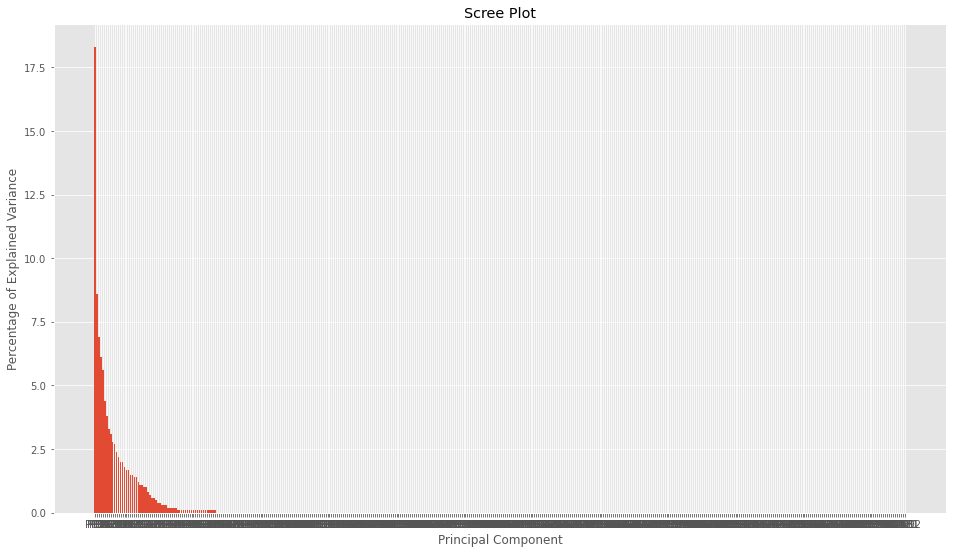

In [147]:
plt.bar(x=range(1, len(per_var_alldataset) + 1 ), height = per_var_alldataset, tick_label = labels_alldataset)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [148]:
#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_alldataset_alldataset = pd.DataFrame(pca_data_alldataset, index = alldataset_dataset_10_10inst.columns , columns = labels_alldataset)

In [149]:
# Loading scores for PC1

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[0], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC1_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC1_df_alldataset = PC1_loading_scores_alldataset.to_frame()
PC1_df_alldataset = PC1_df_alldataset.rename(columns={0: 'Col_1'})
PC1_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC2


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[1], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values


PC2_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC2_df_alldataset = PC2_loading_scores_alldataset.to_frame()
PC2_df_alldataset = PC2_df_alldataset.rename(columns={0: 'Col_1'})
PC2_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC3


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[2], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values
PC3_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC3_df_alldataset = PC3_loading_scores_alldataset.to_frame()
PC3_df_alldataset = PC3_df_alldataset.rename(columns={0: 'Col_1'})
PC3_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC4


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[3], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC4_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC4_df_alldataset = PC4_loading_scores_alldataset.to_frame()
PC4_df_alldataset = PC4_df_alldataset.rename(columns={0: 'Col_1'})
PC4_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC5


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[4], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)
top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC5_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC5_df_alldataset = PC5_loading_scores_alldataset.to_frame()
PC5_df_alldataset = PC5_df_alldataset.rename(columns={0: 'Col_1'})
PC5_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC6


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[5], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC6_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC6_df_alldataset = PC6_loading_scores_alldataset.to_frame()
PC6_df_alldataset = PC6_df_alldataset.rename(columns={0: 'Col_1'})
PC6_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC7


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[6], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC7_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC7_df_alldataset = PC7_loading_scores_alldataset.to_frame()
PC7_df_alldataset = PC7_df_alldataset.rename(columns={0: 'Col_1'})
PC7_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC8


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[7], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC8_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC8_df_alldataset = PC8_loading_scores_alldataset.to_frame()
PC8_df_alldataset = PC8_df_alldataset.rename(columns={0: 'Col_1'})
PC8_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC9

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[8], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC9_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC9_df_alldataset = PC9_loading_scores_alldataset.to_frame()
PC9_df_alldataset = PC9_df_alldataset.rename(columns={0: 'Col_1'})

PC9_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC10

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[9], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC10_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC10_df_alldataset = PC10_loading_scores_alldataset.to_frame()
PC10_df_alldataset = PC10_df_alldataset.rename(columns={0: 'Col_1'})
PC10_df_alldataset.reset_index(level=0, inplace=True)



In [150]:
###########

#calcular qué feature se repite más

PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)

dic = {}
for i in range(100):
    x = list(PCA_10components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_13044\241421543.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_13044\241421543.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)
C:\Users\BRENDA\AppData\Local\

{'feature_803': 1,
 'feature_933': 1,
 'feature_673': 1,
 'feature_1063': 1,
 'feature_543': 1,
 'feature_1193': 1,
 'feature_413': 1,
 'feature_283': 1,
 'feature_153': 1,
 'feature_23': 1,
 'feature_690': 1,
 'feature_560': 1,
 'feature_820': 1,
 'feature_694': 1,
 'feature_686': 1,
 'feature_824': 1,
 'feature_564': 1,
 'feature_556': 1,
 'feature_816': 1,
 'feature_950': 1,
 'feature_680': 1,
 'feature_940': 1,
 'feature_810': 1,
 'feature_944': 1,
 'feature_814': 1,
 'feature_550': 1,
 'feature_684': 1,
 'feature_1070': 1,
 'feature_952': 1,
 'feature_822': 1,
 'feature_532': 1,
 'feature_662': 1,
 'feature_530': 1,
 'feature_660': 1,
 'feature_402': 1,
 'feature_792': 1,
 'feature_528': 1,
 'feature_400': 1,
 'feature_658': 1,
 'feature_790': 1,
 'feature_357': 1,
 'feature_355': 1,
 'feature_353': 1,
 'feature_359': 1,
 'feature_373': 1,
 'feature_363': 1,
 'feature_361': 1,
 'feature_371': 1,
 'feature_365': 1,
 'feature_367': 1,
 'feature_521': 1,
 'feature_523': 1,
 'feature_

In [151]:
##############################
  #HOW TO CALCULATE WITH PCA ( 10 components )
#############################

		
projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70','PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80','PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90','PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100','PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110','PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120','PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130','PC131','PC132','PC133','PC134','PC135','PC136','PC137','PC138','PC139','PC140','PC141','PC142','PC143','PC144','PC145','PC146','PC147','PC148','PC149','PC150','PC151','PC152','PC153','PC154','PC155','PC156','PC157','PC158','PC159','PC160',
      ' PC161', ' PC162', ' PC163', ' PC164', ' PC165', ' PC166', ' PC167', ' PC168', ' PC169', ' PC170', ' PC171', ' PC172', ' PC173', ' PC174', ' PC175', ' PC176', ' PC177', ' PC178', ' PC179', ' PC180', ' PC181', ' PC182', ' PC183', ' PC184', ' PC185', ' PC186', ' PC187', ' PC188', ' PC189', ' PC190', ' PC191', ' PC192', ' PC193', ' PC194', ' PC195', ' PC196', ' PC197', ' PC198', ' PC199', ' PC200', ' PC201', ' PC202', ' PC203', ' PC204', ' PC205', ' PC206', ' PC207', ' PC208', ' PC209', ' PC210', ' PC211', ' PC212', ' PC213', ' PC214', ' PC215', ' PC216', ' PC217', ' PC218', ' PC219', ' PC220', ' PC221', ' PC222', ' PC223', ' PC224', ' PC225', ' PC226', ' PC227', ' PC228', ' PC229', ' PC230', ' PC231', ' PC232', ' PC233', ' PC234', ' PC235', ' PC236', ' PC237', ' PC238', ' PC239', ' PC240', ' PC241', ' PC242', ' PC243', ' PC244', ' PC245', ' PC246', ' PC247', ' PC248', ' PC249', ' PC250', ' PC251', ' PC252', ' PC253', ' PC254', ' PC255', ' PC256', ' PC257', ' PC258', ' PC259', ' PC260', ' PC261', ' PC262', ' PC263', ' PC264', ' PC265', ' PC266', ' PC267', ' PC268', ' PC269', ' PC270', ' PC271', ' PC272', ' PC273', ' PC274', ' PC275', ' PC276', ' PC277', ' PC278', ' PC279', ' PC280', ' PC281', ' PC282', ' PC283', ' PC284', ' PC285', ' PC286', ' PC287', ' PC288', ' PC289', ' PC290', ' PC291', ' PC292', ' PC293', ' PC294', ' PC295', ' PC296', ' PC297', ' PC298', ' PC299', ' PC300', ' PC301', ' PC302', ' PC303', ' PC304', ' PC305', ' PC306', ' PC307', ' PC308', ' PC309', ' PC310', ' PC311', ' PC312', ' PC313', ' PC314', ' PC315', ' PC316', ' PC317', ' PC318', ' PC319', ' PC320', ' PC321', ' PC322', ' PC323', ' PC324', ' PC325', ' PC326', ' PC327', ' PC328', ' PC329', ' PC330', ' PC331', ' PC332', ' PC333', ' PC334', ' PC335', ' PC336', ' PC337', ' PC338', ' PC339', ' PC340', ' PC341', ' PC342', ' PC343', ' PC344', ' PC345', ' PC346', ' PC347', ' PC348', ' PC349', ' PC350', ' PC351', ' PC352', ' PC353', ' PC354', ' PC355', ' PC356', ' PC357', ' PC358', ' PC359', ' PC360', ' PC361', ' PC362', ' PC363', ' PC364', ' PC365', ' PC366', ' PC367', ' PC368', ' PC369', ' PC370', ' PC371', ' PC372', ' PC373', ' PC374', ' PC375', ' PC376', ' PC377', ' PC378', ' PC379', ' PC380', ' PC381', ' PC382', ' PC383', ' PC384', ' PC385', ' PC386', ' PC387', ' PC388', ' PC389', ' PC390', ' PC391', ' PC392', ' PC393', ' PC394', ' PC395', ' PC396', ' PC397', ' PC398', ' PC399', ' PC400', ' PC401', ' PC402', ' PC403', ' PC404', ' PC405', ' PC406', ' PC407', ' PC408', ' PC409', ' PC410', ' PC411', ' PC412'


    ],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC403,PC404,PC405,PC406,PC407,PC408,PC409,PC410,PC411,PC412
0,-4.528074,-2.638061,14.159527,5.288799,2.515869,-0.824028,4.272228,-2.288811,-1.211159,0.044263,...,0.011776,-0.001900,0.035636,0.043134,-0.025670,0.013876,-0.028737,0.010708,-0.026242,-0.009347
1,-4.622437,-2.537022,15.856673,4.871264,1.738113,-1.793658,3.071790,-2.555312,-1.301314,-0.436962,...,0.008768,-0.003989,0.016902,0.019748,-0.019826,0.006392,-0.026964,0.009377,-0.021745,-0.007444
2,-4.437346,-2.658644,14.578364,5.557970,2.116777,-0.362462,3.210343,-1.913276,-1.006665,1.654638,...,0.016737,-0.001201,0.010805,0.036083,-0.013169,0.002613,-0.025216,-0.003463,-0.038061,-0.009789
3,-4.826568,-0.660748,16.045754,4.022805,2.770404,-1.820848,2.805108,-1.784449,0.599038,2.903371,...,0.042816,-0.024578,-0.021911,0.036974,-0.007332,-0.007523,-0.042360,-0.014631,-0.013134,-0.007533
4,-4.035635,-2.972400,17.856654,5.854090,4.373910,-2.953554,1.465368,-1.669517,0.568552,-0.940736,...,0.021340,-0.015873,0.010499,0.039418,-0.021549,0.010156,-0.027306,-0.011656,-0.024111,-0.010865


In [152]:
#Just take the 10 first components
PC10_10_10inst_alldataset = projection_alldataset.iloc[:,0:10]
PC10_10_10inst_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-4.528074,-2.638061,14.159527,5.288799,2.515869,-0.824028,4.272228,-2.288811,-1.211159,0.044263
1,-4.622437,-2.537022,15.856673,4.871264,1.738113,-1.793658,3.071790,-2.555312,-1.301314,-0.436962
2,-4.437346,-2.658644,14.578364,5.557970,2.116777,-0.362462,3.210343,-1.913276,-1.006665,1.654638
3,-4.826568,-0.660748,16.045754,4.022805,2.770404,-1.820848,2.805108,-1.784449,0.599038,2.903371
4,-4.035635,-2.972400,17.856654,5.854090,4.373910,-2.953554,1.465368,-1.669517,0.568552,-0.940736


In [153]:

PC10_10_10inst_alldataset.insert(0,"instance",['abuelo_262','abuelo_266','abuelo_30','aceptar_185','aceptar_66'
,'ahora_243','ahora_246','ahora_74','ahí_101','ahí_151','ahí_231'
,'alegría_254','alegría_289','ambiente_203','amigo_105','amigo_171'
,'antes_114','antes_248','antes_283','antes_41','aprender_175'
,'aprender_195','aprender_217','aprender_282','aquí_19','bien_241'
,'bien_244','bien_278','bien_39','cambiar_50','casa_256','casa_9'
,'controlar_176','controlar_178','crecer_136','cuerpo_51','cómo_223'
,'cómo_44','cómo_85','decir_138','decir_265','dejar_129','dejar_131'
,'dentro_55','dos_280','día_261','edad_60','emoción_143','emoción_145'
,'emoción_249','emoción_250','emoción_281','emoción_43','emoción_45'
,'emoción_93','enojar_102','enojar_107','enojar_124','entender_137'
,'entender_141','familia_204','feliz_274','habitación_267','hermano_100'
,'hermano_116','hermano_150','hermano_169','hola_0','hoy_221','idea_10'
,'ira_290','jugar_130','jugar_98','juntos_36','ministerio_11'
,'más o menos_61','necesitar_147','nosotros_183','no_108','objetivo_208'
,'paciencia_153','paciencia_158','papá_27','preguntar_75','primaria_22'
,'primo_104','profesor_252','que_148','que_190','razón_146','recordar_206'
,'recordar_247','recordar_62','relación_161','seguro_18','seguro_21'
,'seleccionar_222','sentir_187','sexto_24','sí_155','sí_157','sí_159'
,'sí_194','sí_200','sí_228','sí_240','sí_242','sí_251','sí_277','sí_37'
,'sí_76','sí_79','sí_83','tiempo_49','tiempo_91','tú_207','tú_96'
,'uno_260','usar_214','ustedes_239','venir_26','venir_31','yo_119'
,'yo_152','yo_193','yo_3','adentro_150','agrupar_103','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_186','agua_202'
,'agua_399','agua_537','ahora_463','amarrar_181','animales_652','antes_89'
,'aprender_34','aprender__466','aproximadamente_193','aproximadamente_745'
,'aquí_189','aquí_330','beneficio_411','bien_147','bien_16','bien_294'
,'bien_329','bien_337','bien_401','bien_626','botar_205','brotar_117'
,'brotar_136','buen_0','buen_151','cada uno_714','cada uno_748'
,'cambiar_108','cambiar_140','carne_218','carne_326','colores_813'
,'comer_238','comer_248','comer_286','comer_303','comer_309','comer_312'
,'comer_313','comer_323','comer_355','comer_452','comer_477','comer_590'
,'comer_705','comer_709','conocer_79','conocer_83','contento_516'
,'continuar_356','crecer_120','cuaderno_55','cuaderno_810','cuerpo_476'
,'cuerpo_597','cuántos_443','cuántos_620','cuánto_405','cuánto_420'
,'cuánto_445','cuánto_456','cuánto_460','cuánto_468','cuánto_483'
,'cuánto_703','cuánto_706','cuánto_708','cuánto_742','cuánto_744'
,'cómo_230','cómo_379','cómo_427','cómo_9','decir_224','decir_321'
,'decir_433','decir_755','dentro_371','dentro_486','dentro_566'
,'dentro_596','dentro_627','diariamente_402','diariamente_479'
,'dibujar_261','diferentes_471','diferentes_668','diferentes_750'
,'diferente_71','dos_669','dos_682','día_197','ejercicios_726','ella_527'
,'ella_616','ellos_746','ellos_754','ellos_767','ellos_772','empezar_32'
,'entonces_364','entonces_480','escribir_56','escribir_60','escribir_797'
,'ese_143','ese_214','ese_544','ese_719','familia_165','familia_45'
,'familia_75','feliz_15','fortalecer_548','fortalecer_582','frijol_175'
,'frijol_434','fuerte_152','fuerte_314','fuerte_361','fuerte_362'
,'fuerte_363','fuerte_459','fuerte_487','fuerte_584','fuerte_588'
,'fuerte_628','fácil_255','fácil_341','grasa_534','grasa_553','grasa_557'
,'guardar_105','guardar_93','guardar_97','gustar_439','gustar_453'
,'hacer_161','hacer_172','hacer_81','hermano_39','hermano_40','hola_508'
,'hola_632','hoy_521','hoy_540','idea_21','importante_629'
,'importante_636','interesante_113','interesante_610','juntos_517'
,'juntos_519','juntos_618','juntos_621','llamar_46','mal_301','mal_334'
,'mal_336','ministerio_23','más o menos_763','niños_2','niños_736'
,'niños_770','nombre_7','no_289','no_297','no_333','no_462','no_667'
,'o_272','o_722','pensar_213','pensar_378','pensar_461','pensar_61'
,'pensar_613','pensar_641','pensar_753','pero_376','pero_442','pero_611'
,'pero_660','planta_119','planta_159','planta_173','planta_215'
,'planta_217','planta_435','poder_162','poder_645','porcentaje_507'
,'porción_421','porción_425','preguntas_59','primaria_775','primo_38'
,'probar_317','probar_67','proceso_170','proceso_351','profesor_501'
,'profesor_817','proteínas_370','proteínas_572','proteínas_648'
,'proteínas_676','proteínas_694','proteínas_784','proteína_393'
,'quinto_773','qué_212','qué_573','qué__131','razón_658','recordar_169'
,'saludable_227','salud_239','salud_271','salud_345','seco_222'
,'semana_64','sentir_14','sentir_149','sentir_458','sentir_570'
,'sentir_591','ser_226','ser_342','sexto_4','sexto_738','solo_661'
,'sí_278','sí_281','sí_284','sí_291','sí_315','sí_419','sí_565','sí_633'
,'sí_659','sí__228','también_182','también_552','tener_530','todo_320'
,'todo_327','todo_606','tú_229','tú_243','tú_247','tú_263','tú_53'
,'tú_635','tú_711','tú_80','tú_803','uno_674','usar_90','vaca_653'
,'vaca_662','vaca_688','valor_485','valor_764','venir_54','venir_806'
,'venir_818','ver_49','ver_622','ya_115','ya_125','ya_30','ya_35','ya_350'
,'yo_630','él_285','él_524'
],True)

In [154]:
PC10_10_10inst_alldataset['classes'] = PC10_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_13044\2242510311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_alldataset['classes'] = PC10_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])


In [155]:
PC10_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC10_10_10inst_alldataset.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_13044\3033980328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_alldataset.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,-4.528074,-2.638061,14.159527,5.288799,2.515869,-0.824028,4.272228,-2.288811,-1.211159,0.044263,abuelo
1,-4.622437,-2.537022,15.856673,4.871264,1.738113,-1.793658,3.071790,-2.555312,-1.301314,-0.436962,abuelo
2,-4.437346,-2.658644,14.578364,5.557970,2.116777,-0.362462,3.210343,-1.913276,-1.006665,1.654638,abuelo
3,-4.826568,-0.660748,16.045754,4.022805,2.770404,-1.820848,2.805108,-1.784449,0.599038,2.903371,aceptar
4,-4.035635,-2.972400,17.856654,5.854090,4.373910,-2.953554,1.465368,-1.669517,0.568552,-0.940736,aceptar


In [156]:
print(pd.unique(PC10_10_10inst_alldataset['classes']))

X_PC10_10_10inst_alldataset= PC10_10_10inst_alldataset.iloc[:,:-1].values
y_PC10_10_10inst_alldataset=  PC10_10_10inst_alldataset.iloc[:,-1].values

['abuelo' 'aceptar' 'ahora' 'ahí' 'alegría' 'ambiente' 'amigo' 'antes'
 'aprender' 'aquí' 'bien' 'cambiar' 'casa' 'controlar' 'crecer' 'cuerpo'
 'cómo' 'decir' 'dejar' 'dentro' 'dos' 'día' 'edad' 'emoción' 'enojar'
 'entender' 'familia' 'feliz' 'habitación' 'hermano' 'hola' 'hoy' 'idea'
 'ira' 'jugar' 'juntos' 'ministerio' 'más o menos' 'necesitar' 'nosotros'
 'no' 'objetivo' 'paciencia' 'papá' 'preguntar' 'primaria' 'primo'
 'profesor' 'que' 'razón' 'recordar' 'relación' 'seguro' 'seleccionar'
 'sentir' 'sexto' 'sí' 'tiempo' 'tú' 'uno' 'usar' 'ustedes' 'venir' 'yo'
 'adentro' 'agrupar' 'agua' 'amarrar' 'animales' 'aproximadamente'
 'beneficio' 'botar' 'brotar' 'buen' 'cada uno' 'carne' 'colores' 'comer'
 'conocer' 'contento' 'continuar' 'cuaderno' 'cuántos' 'cuánto'
 'diariamente' 'dibujar' 'diferentes' 'diferente' 'ejercicios' 'ella'
 'ellos' 'empezar' 'entonces' 'escribir' 'ese' 'fortalecer' 'frijol'
 'fuerte' 'fácil' 'grasa' 'guardar' 'gustar' 'hacer' 'importante'
 'interesante' 'l

In [157]:
Labelencoder_Y = LabelEncoder()
y_PC10_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC10_10_10inst_alldataset)
y_PC10_10_10inst_alldataset

array(['abuelo', 'abuelo', 'abuelo', 'aceptar', 'aceptar', 'ahora',
       'ahora', 'ahora', 'ahí', 'ahí', 'ahí', 'alegría', 'alegría',
       'ambiente', 'amigo', 'amigo', 'antes', 'antes', 'antes', 'antes',
       'aprender', 'aprender', 'aprender', 'aprender', 'aquí', 'bien',
       'bien', 'bien', 'bien', 'cambiar', 'casa', 'casa', 'controlar',
       'controlar', 'crecer', 'cuerpo', 'cómo', 'cómo', 'cómo', 'decir',
       'decir', 'dejar', 'dejar', 'dentro', 'dos', 'día', 'edad',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'enojar', 'enojar', 'enojar', 'entender',
       'entender', 'familia', 'feliz', 'habitación', 'hermano', 'hermano',
       'hermano', 'hermano', 'hola', 'hoy', 'idea', 'ira', 'jugar',
       'jugar', 'juntos', 'ministerio', 'más o menos', 'necesitar',
       'nosotros', 'no', 'objetivo', 'paciencia', 'paciencia', 'papá',
       'preguntar', 'primaria', 'primo', 'profesor', 'que', 'que',
       'razón', '

In [158]:
X_train_PC10_10_10inst_alldataset, X_test_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset = train_test_split(X_PC10_10_10inst_alldataset, y_PC10_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_10_10inst_alldataset = scaler.fit_transform(X_train_PC10_10_10inst_alldataset)
X_test_PC10_10_10inst_alldataset = scaler.transform(X_test_PC10_10_10inst_alldataset)

([<matplotlib.axis.XTick at 0x1b801718910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

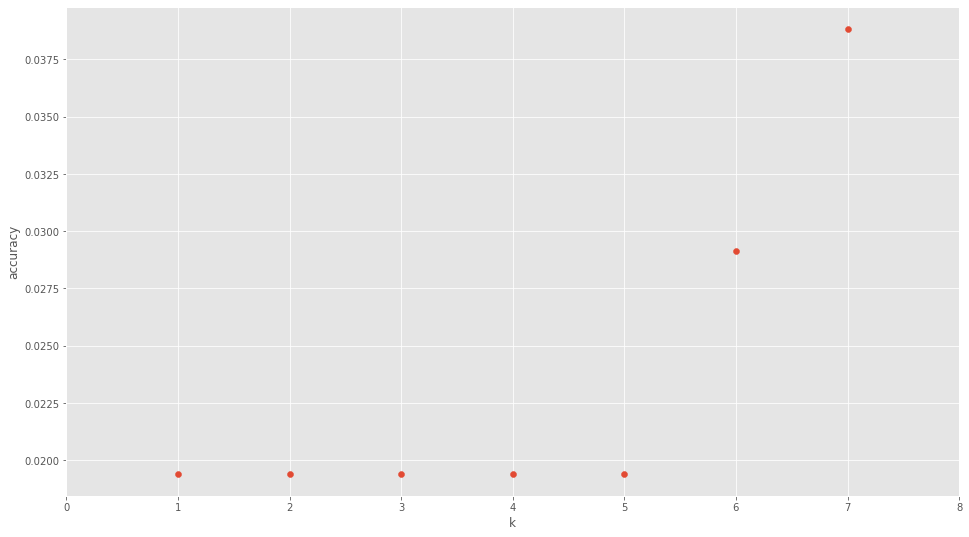

In [159]:
k_range_PC10_10_10inst_alldataset = range(1, 8)
scores_PC10_10_10inst_alldataset = []
for k in k_range_PC10_10_10inst_alldataset:
    knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
    scores_PC10_10_10inst_alldataset.append(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_10_10inst_alldataset, scores_PC10_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.02


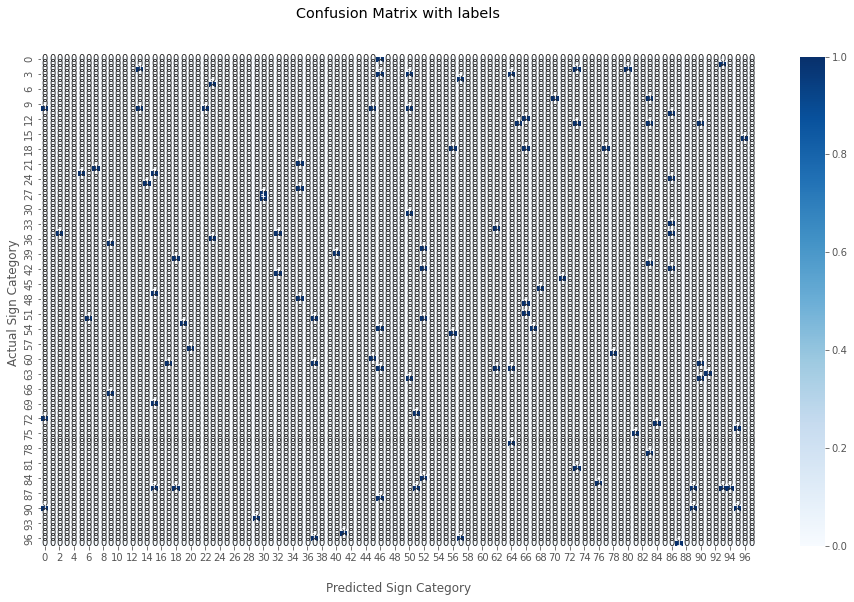

In [160]:
n_neighbors_PC10_10_10inst_alldataset = 1
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.51
Accuracy of K-NN classifier on test set: 0.02


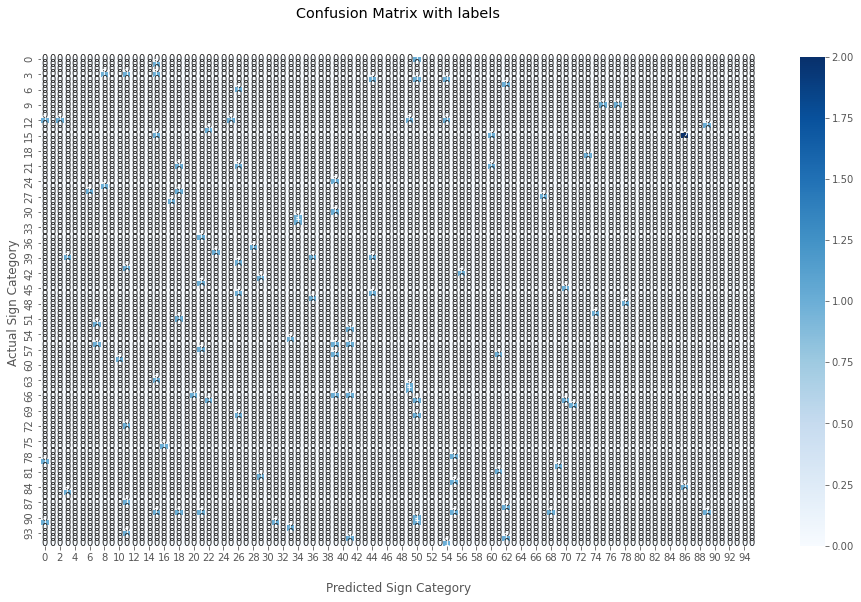

In [161]:
n_neighbors_PC10_10_10inst_alldataset = 2
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.37
Accuracy of K-NN classifier on test set: 0.02


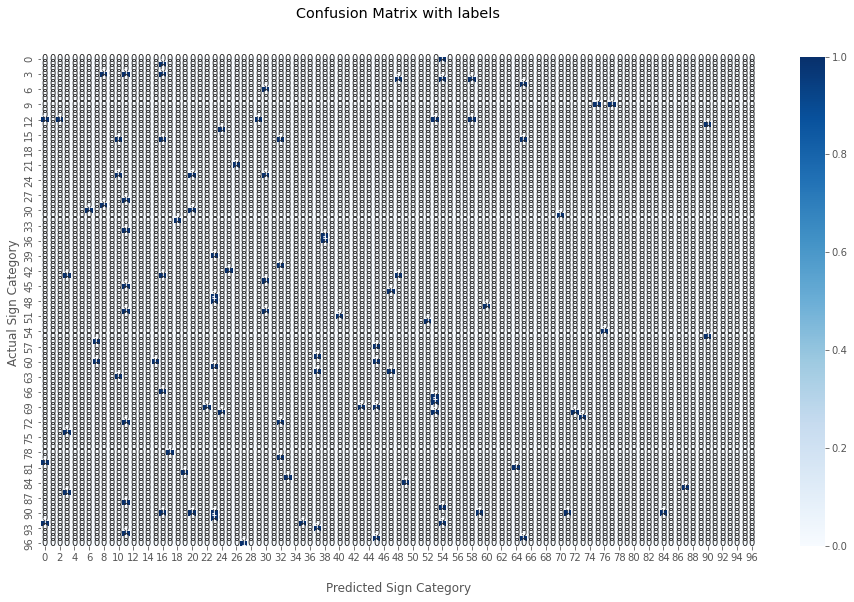

In [162]:
n_neighbors_PC10_10_10inst_alldataset = 3
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.27
Accuracy of K-NN classifier on test set: 0.02


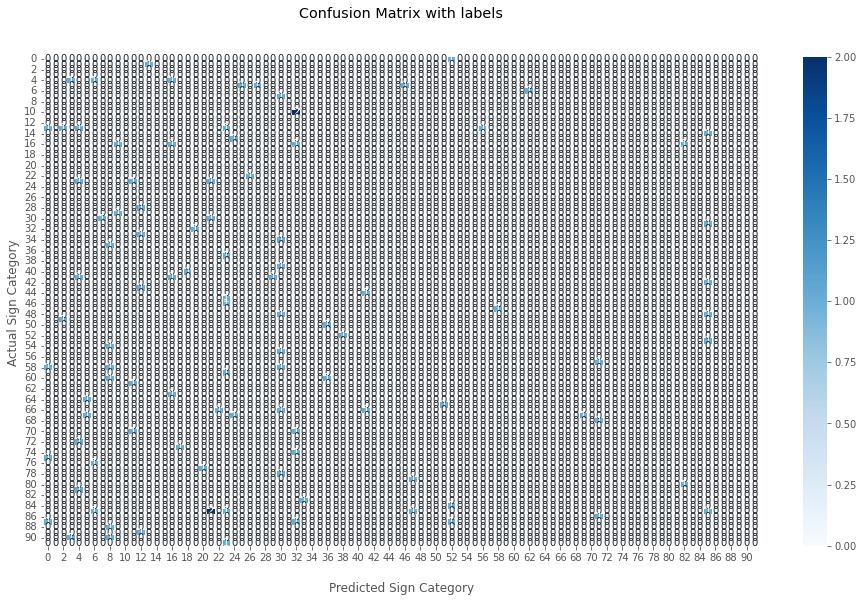

In [163]:
n_neighbors_PC10_10_10inst_alldataset = 5
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [164]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################

projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70','PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80','PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90','PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100','PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110','PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120','PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130','PC131','PC132','PC133','PC134','PC135','PC136','PC137','PC138','PC139','PC140','PC141','PC142','PC143','PC144','PC145','PC146','PC147','PC148','PC149','PC150','PC151','PC152','PC153','PC154','PC155','PC156','PC157','PC158','PC159','PC160',
      ' PC161', ' PC162', ' PC163', ' PC164', ' PC165', ' PC166', ' PC167', ' PC168', ' PC169', ' PC170', ' PC171', ' PC172', ' PC173', ' PC174', ' PC175', ' PC176', ' PC177', ' PC178', ' PC179', ' PC180', ' PC181', ' PC182', ' PC183', ' PC184', ' PC185', ' PC186', ' PC187', ' PC188', ' PC189', ' PC190', ' PC191', ' PC192', ' PC193', ' PC194', ' PC195', ' PC196', ' PC197', ' PC198', ' PC199', ' PC200', ' PC201', ' PC202', ' PC203', ' PC204', ' PC205', ' PC206', ' PC207', ' PC208', ' PC209', ' PC210', ' PC211', ' PC212', ' PC213', ' PC214', ' PC215', ' PC216', ' PC217', ' PC218', ' PC219', ' PC220', ' PC221', ' PC222', ' PC223', ' PC224', ' PC225', ' PC226', ' PC227', ' PC228', ' PC229', ' PC230', ' PC231', ' PC232', ' PC233', ' PC234', ' PC235', ' PC236', ' PC237', ' PC238', ' PC239', ' PC240', ' PC241', ' PC242', ' PC243', ' PC244', ' PC245', ' PC246', ' PC247', ' PC248', ' PC249', ' PC250', ' PC251', ' PC252', ' PC253', ' PC254', ' PC255', ' PC256', ' PC257', ' PC258', ' PC259', ' PC260', ' PC261', ' PC262', ' PC263', ' PC264', ' PC265', ' PC266', ' PC267', ' PC268', ' PC269', ' PC270', ' PC271', ' PC272', ' PC273', ' PC274', ' PC275', ' PC276', ' PC277', ' PC278', ' PC279', ' PC280', ' PC281', ' PC282', ' PC283', ' PC284', ' PC285', ' PC286', ' PC287', ' PC288', ' PC289', ' PC290', ' PC291', ' PC292', ' PC293', ' PC294', ' PC295', ' PC296', ' PC297', ' PC298', ' PC299', ' PC300', ' PC301', ' PC302', ' PC303', ' PC304', ' PC305', ' PC306', ' PC307', ' PC308', ' PC309', ' PC310', ' PC311', ' PC312', ' PC313', ' PC314', ' PC315', ' PC316', ' PC317', ' PC318', ' PC319', ' PC320', ' PC321', ' PC322', ' PC323', ' PC324', ' PC325', ' PC326', ' PC327', ' PC328', ' PC329', ' PC330', ' PC331', ' PC332', ' PC333', ' PC334', ' PC335', ' PC336', ' PC337', ' PC338', ' PC339', ' PC340', ' PC341', ' PC342', ' PC343', ' PC344', ' PC345', ' PC346', ' PC347', ' PC348', ' PC349', ' PC350', ' PC351', ' PC352', ' PC353', ' PC354', ' PC355', ' PC356', ' PC357', ' PC358', ' PC359', ' PC360', ' PC361', ' PC362', ' PC363', ' PC364', ' PC365', ' PC366', ' PC367', ' PC368', ' PC369', ' PC370', ' PC371', ' PC372', ' PC373', ' PC374', ' PC375', ' PC376', ' PC377', ' PC378', ' PC379', ' PC380', ' PC381', ' PC382', ' PC383', ' PC384', ' PC385', ' PC386', ' PC387', ' PC388', ' PC389', ' PC390', ' PC391', ' PC392', ' PC393', ' PC394', ' PC395', ' PC396', ' PC397', ' PC398', ' PC399', ' PC400', ' PC401', ' PC402', ' PC403', ' PC404', ' PC405', ' PC406', ' PC407', ' PC408', ' PC409', ' PC410', ' PC411', ' PC412'

],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC403,PC404,PC405,PC406,PC407,PC408,PC409,PC410,PC411,PC412
0,-4.528074,-2.638061,14.159527,5.288799,2.515869,-0.824028,4.272228,-2.288811,-1.211159,0.044263,...,0.011776,-0.001900,0.035636,0.043134,-0.025670,0.013876,-0.028737,0.010708,-0.026242,-0.009347
1,-4.622437,-2.537022,15.856673,4.871264,1.738113,-1.793658,3.071790,-2.555312,-1.301314,-0.436962,...,0.008768,-0.003989,0.016902,0.019748,-0.019826,0.006392,-0.026964,0.009377,-0.021745,-0.007444
2,-4.437346,-2.658644,14.578364,5.557970,2.116777,-0.362462,3.210343,-1.913276,-1.006665,1.654638,...,0.016737,-0.001201,0.010805,0.036083,-0.013169,0.002613,-0.025216,-0.003463,-0.038061,-0.009789
3,-4.826568,-0.660748,16.045754,4.022805,2.770404,-1.820848,2.805108,-1.784449,0.599038,2.903371,...,0.042816,-0.024578,-0.021911,0.036974,-0.007332,-0.007523,-0.042360,-0.014631,-0.013134,-0.007533
4,-4.035635,-2.972400,17.856654,5.854090,4.373910,-2.953554,1.465368,-1.669517,0.568552,-0.940736,...,0.021340,-0.015873,0.010499,0.039418,-0.021549,0.010156,-0.027306,-0.011656,-0.024111,-0.010865


In [165]:
PC6_10_10inst_alldataset = projection_alldataset.iloc[:,0:6]
PC6_10_10inst_alldataset.head()

PC6_10_10inst_alldataset.insert(0,"instance",['abuelo_262','abuelo_266','abuelo_30','aceptar_185','aceptar_66'
,'ahora_243','ahora_246','ahora_74','ahí_101','ahí_151','ahí_231'
,'alegría_254','alegría_289','ambiente_203','amigo_105','amigo_171'
,'antes_114','antes_248','antes_283','antes_41','aprender_175'
,'aprender_195','aprender_217','aprender_282','aquí_19','bien_241'
,'bien_244','bien_278','bien_39','cambiar_50','casa_256','casa_9'
,'controlar_176','controlar_178','crecer_136','cuerpo_51','cómo_223'
,'cómo_44','cómo_85','decir_138','decir_265','dejar_129','dejar_131'
,'dentro_55','dos_280','día_261','edad_60','emoción_143','emoción_145'
,'emoción_249','emoción_250','emoción_281','emoción_43','emoción_45'
,'emoción_93','enojar_102','enojar_107','enojar_124','entender_137'
,'entender_141','familia_204','feliz_274','habitación_267','hermano_100'
,'hermano_116','hermano_150','hermano_169','hola_0','hoy_221','idea_10'
,'ira_290','jugar_130','jugar_98','juntos_36','ministerio_11'
,'más o menos_61','necesitar_147','nosotros_183','no_108','objetivo_208'
,'paciencia_153','paciencia_158','papá_27','preguntar_75','primaria_22'
,'primo_104','profesor_252','que_148','que_190','razón_146','recordar_206'
,'recordar_247','recordar_62','relación_161','seguro_18','seguro_21'
,'seleccionar_222','sentir_187','sexto_24','sí_155','sí_157','sí_159'
,'sí_194','sí_200','sí_228','sí_240','sí_242','sí_251','sí_277','sí_37'
,'sí_76','sí_79','sí_83','tiempo_49','tiempo_91','tú_207','tú_96'
,'uno_260','usar_214','ustedes_239','venir_26','venir_31','yo_119'
,'yo_152','yo_193','yo_3','adentro_150','agrupar_103','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_186','agua_202'
,'agua_399','agua_537','ahora_463','amarrar_181','animales_652','antes_89'
,'aprender_34','aprender__466','aproximadamente_193','aproximadamente_745'
,'aquí_189','aquí_330','beneficio_411','bien_147','bien_16','bien_294'
,'bien_329','bien_337','bien_401','bien_626','botar_205','brotar_117'
,'brotar_136','buen_0','buen_151','cada uno_714','cada uno_748'
,'cambiar_108','cambiar_140','carne_218','carne_326','colores_813'
,'comer_238','comer_248','comer_286','comer_303','comer_309','comer_312'
,'comer_313','comer_323','comer_355','comer_452','comer_477','comer_590'
,'comer_705','comer_709','conocer_79','conocer_83','contento_516'
,'continuar_356','crecer_120','cuaderno_55','cuaderno_810','cuerpo_476'
,'cuerpo_597','cuántos_443','cuántos_620','cuánto_405','cuánto_420'
,'cuánto_445','cuánto_456','cuánto_460','cuánto_468','cuánto_483'
,'cuánto_703','cuánto_706','cuánto_708','cuánto_742','cuánto_744'
,'cómo_230','cómo_379','cómo_427','cómo_9','decir_224','decir_321'
,'decir_433','decir_755','dentro_371','dentro_486','dentro_566'
,'dentro_596','dentro_627','diariamente_402','diariamente_479'
,'dibujar_261','diferentes_471','diferentes_668','diferentes_750'
,'diferente_71','dos_669','dos_682','día_197','ejercicios_726','ella_527'
,'ella_616','ellos_746','ellos_754','ellos_767','ellos_772','empezar_32'
,'entonces_364','entonces_480','escribir_56','escribir_60','escribir_797'
,'ese_143','ese_214','ese_544','ese_719','familia_165','familia_45'
,'familia_75','feliz_15','fortalecer_548','fortalecer_582','frijol_175'
,'frijol_434','fuerte_152','fuerte_314','fuerte_361','fuerte_362'
,'fuerte_363','fuerte_459','fuerte_487','fuerte_584','fuerte_588'
,'fuerte_628','fácil_255','fácil_341','grasa_534','grasa_553','grasa_557'
,'guardar_105','guardar_93','guardar_97','gustar_439','gustar_453'
,'hacer_161','hacer_172','hacer_81','hermano_39','hermano_40','hola_508'
,'hola_632','hoy_521','hoy_540','idea_21','importante_629'
,'importante_636','interesante_113','interesante_610','juntos_517'
,'juntos_519','juntos_618','juntos_621','llamar_46','mal_301','mal_334'
,'mal_336','ministerio_23','más o menos_763','niños_2','niños_736'
,'niños_770','nombre_7','no_289','no_297','no_333','no_462','no_667'
,'o_272','o_722','pensar_213','pensar_378','pensar_461','pensar_61'
,'pensar_613','pensar_641','pensar_753','pero_376','pero_442','pero_611'
,'pero_660','planta_119','planta_159','planta_173','planta_215'
,'planta_217','planta_435','poder_162','poder_645','porcentaje_507'
,'porción_421','porción_425','preguntas_59','primaria_775','primo_38'
,'probar_317','probar_67','proceso_170','proceso_351','profesor_501'
,'profesor_817','proteínas_370','proteínas_572','proteínas_648'
,'proteínas_676','proteínas_694','proteínas_784','proteína_393'
,'quinto_773','qué_212','qué_573','qué__131','razón_658','recordar_169'
,'saludable_227','salud_239','salud_271','salud_345','seco_222'
,'semana_64','sentir_14','sentir_149','sentir_458','sentir_570'
,'sentir_591','ser_226','ser_342','sexto_4','sexto_738','solo_661'
,'sí_278','sí_281','sí_284','sí_291','sí_315','sí_419','sí_565','sí_633'
,'sí_659','sí__228','también_182','también_552','tener_530','todo_320'
,'todo_327','todo_606','tú_229','tú_243','tú_247','tú_263','tú_53'
,'tú_635','tú_711','tú_80','tú_803','uno_674','usar_90','vaca_653'
,'vaca_662','vaca_688','valor_485','valor_764','venir_54','venir_806'
,'venir_818','ver_49','ver_622','ya_115','ya_125','ya_30','ya_35','ya_350'
,'yo_630','él_285','él_524'
],True)

In [166]:
PC6_10_10inst_alldataset['classes'] = PC6_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_13044\3551985106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_alldataset['classes'] = PC6_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])


In [167]:
PC6_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC6_10_10inst_alldataset.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_13044\1954860938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_alldataset.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,-4.528074,-2.638061,14.159527,5.288799,2.515869,-0.824028,abuelo
1,-4.622437,-2.537022,15.856673,4.871264,1.738113,-1.793658,abuelo
2,-4.437346,-2.658644,14.578364,5.557970,2.116777,-0.362462,abuelo
3,-4.826568,-0.660748,16.045754,4.022805,2.770404,-1.820848,aceptar
4,-4.035635,-2.972400,17.856654,5.854090,4.373910,-2.953554,aceptar


In [168]:
print(pd.unique(PC6_10_10inst_alldataset['classes']))

X_PC6_10_10inst_alldataset= PC6_10_10inst_alldataset.iloc[:,:-1].values
y_PC6_10_10inst_alldataset=  PC6_10_10inst_alldataset.iloc[:,-1].values

['abuelo' 'aceptar' 'ahora' 'ahí' 'alegría' 'ambiente' 'amigo' 'antes'
 'aprender' 'aquí' 'bien' 'cambiar' 'casa' 'controlar' 'crecer' 'cuerpo'
 'cómo' 'decir' 'dejar' 'dentro' 'dos' 'día' 'edad' 'emoción' 'enojar'
 'entender' 'familia' 'feliz' 'habitación' 'hermano' 'hola' 'hoy' 'idea'
 'ira' 'jugar' 'juntos' 'ministerio' 'más o menos' 'necesitar' 'nosotros'
 'no' 'objetivo' 'paciencia' 'papá' 'preguntar' 'primaria' 'primo'
 'profesor' 'que' 'razón' 'recordar' 'relación' 'seguro' 'seleccionar'
 'sentir' 'sexto' 'sí' 'tiempo' 'tú' 'uno' 'usar' 'ustedes' 'venir' 'yo'
 'adentro' 'agrupar' 'agua' 'amarrar' 'animales' 'aproximadamente'
 'beneficio' 'botar' 'brotar' 'buen' 'cada uno' 'carne' 'colores' 'comer'
 'conocer' 'contento' 'continuar' 'cuaderno' 'cuántos' 'cuánto'
 'diariamente' 'dibujar' 'diferentes' 'diferente' 'ejercicios' 'ella'
 'ellos' 'empezar' 'entonces' 'escribir' 'ese' 'fortalecer' 'frijol'
 'fuerte' 'fácil' 'grasa' 'guardar' 'gustar' 'hacer' 'importante'
 'interesante' 'l

In [169]:
Labelencoder_Y = LabelEncoder()
y_PC6_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC6_10_10inst_alldataset)
y_PC6_10_10inst_alldataset

array(['abuelo', 'abuelo', 'abuelo', 'aceptar', 'aceptar', 'ahora',
       'ahora', 'ahora', 'ahí', 'ahí', 'ahí', 'alegría', 'alegría',
       'ambiente', 'amigo', 'amigo', 'antes', 'antes', 'antes', 'antes',
       'aprender', 'aprender', 'aprender', 'aprender', 'aquí', 'bien',
       'bien', 'bien', 'bien', 'cambiar', 'casa', 'casa', 'controlar',
       'controlar', 'crecer', 'cuerpo', 'cómo', 'cómo', 'cómo', 'decir',
       'decir', 'dejar', 'dejar', 'dentro', 'dos', 'día', 'edad',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'enojar', 'enojar', 'enojar', 'entender',
       'entender', 'familia', 'feliz', 'habitación', 'hermano', 'hermano',
       'hermano', 'hermano', 'hola', 'hoy', 'idea', 'ira', 'jugar',
       'jugar', 'juntos', 'ministerio', 'más o menos', 'necesitar',
       'nosotros', 'no', 'objetivo', 'paciencia', 'paciencia', 'papá',
       'preguntar', 'primaria', 'primo', 'profesor', 'que', 'que',
       'razón', '

In [170]:
X_train_PC6_10_10inst_alldataset, X_test_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset = train_test_split(X_PC6_10_10inst_alldataset, y_PC6_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_10_10inst_alldataset = scaler.fit_transform(X_train_PC6_10_10inst_alldataset)
X_test_PC6_10_10inst_alldataset = scaler.transform(X_test_PC6_10_10inst_alldataset)

([<matplotlib.axis.XTick at 0x1b80981d0f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

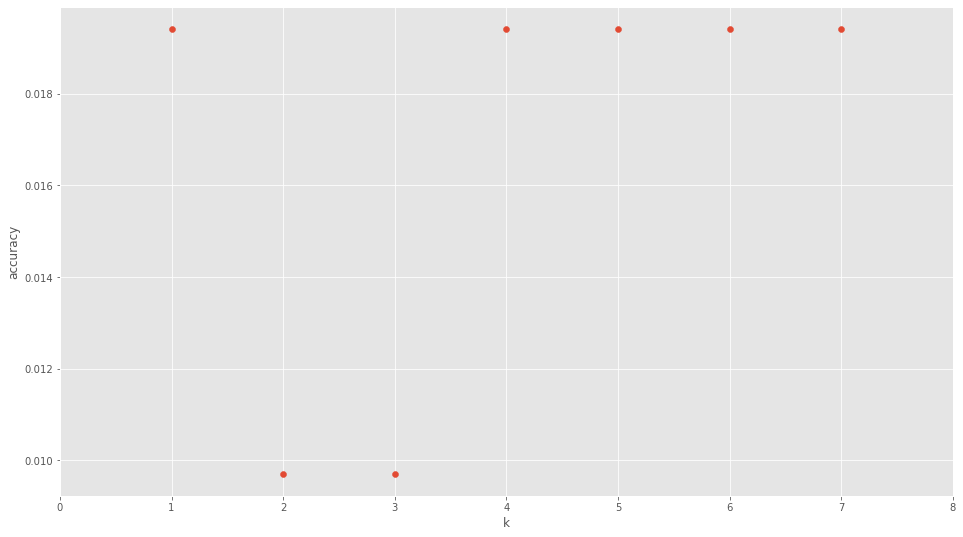

In [171]:
k_range_PC6_10_10inst_alldataset = range(1, 8)
scores_PC6_10_10inst_alldataset = []
for k in k_range_PC6_10_10inst_alldataset:
    knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
    scores_PC6_10_10inst_alldataset.append(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_10_10inst_alldataset, scores_PC6_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.02


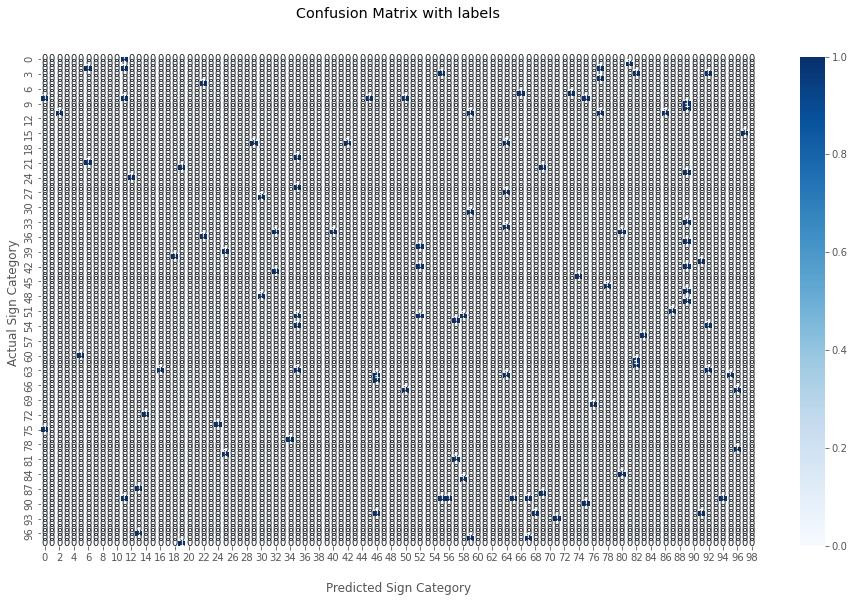

In [172]:
n_neighbors_PC6_10_10inst_alldataset = 1
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.51
Accuracy of K-NN classifier on test set: 0.01


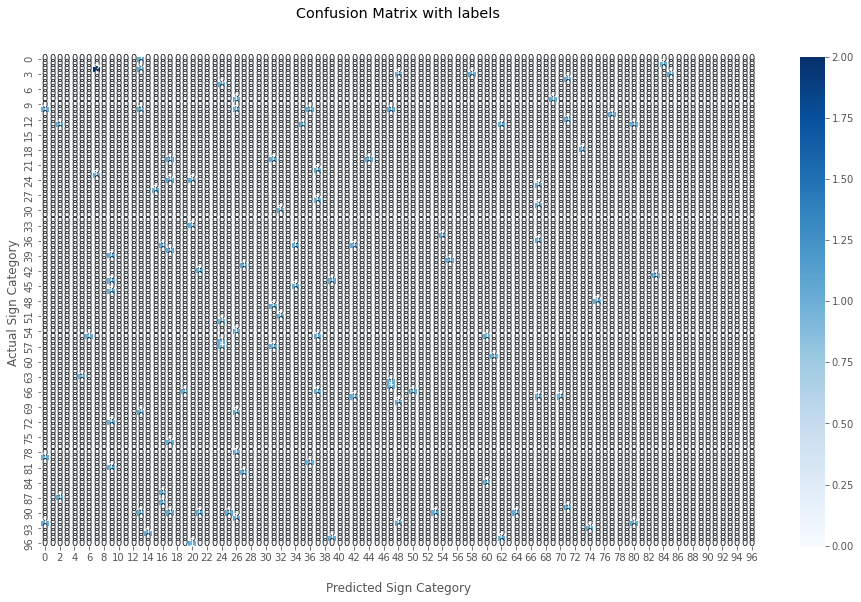

In [173]:
n_neighbors_PC6_10_10inst_alldataset = 2
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.39
Accuracy of K-NN classifier on test set: 0.01


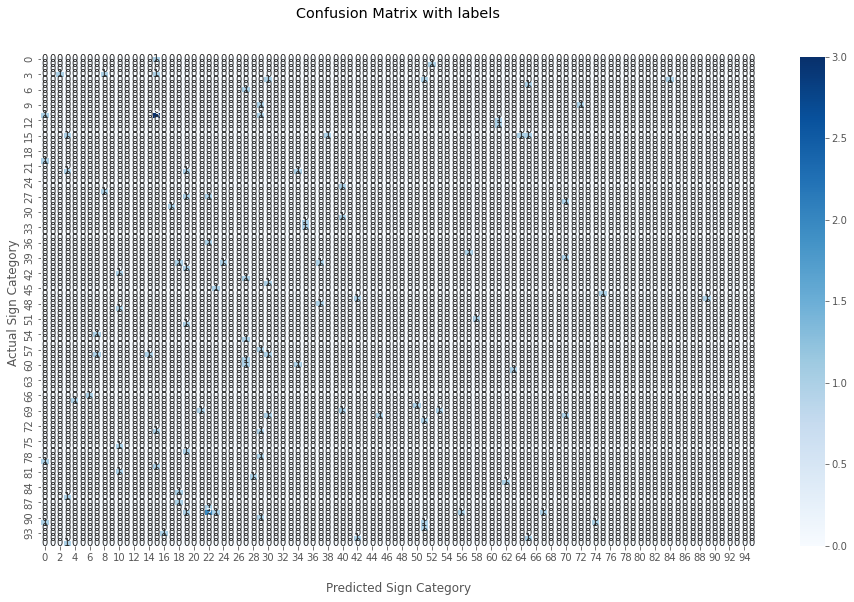

In [174]:
n_neighbors_PC6_10_10inst_alldataset = 3
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.25
Accuracy of K-NN classifier on test set: 0.02


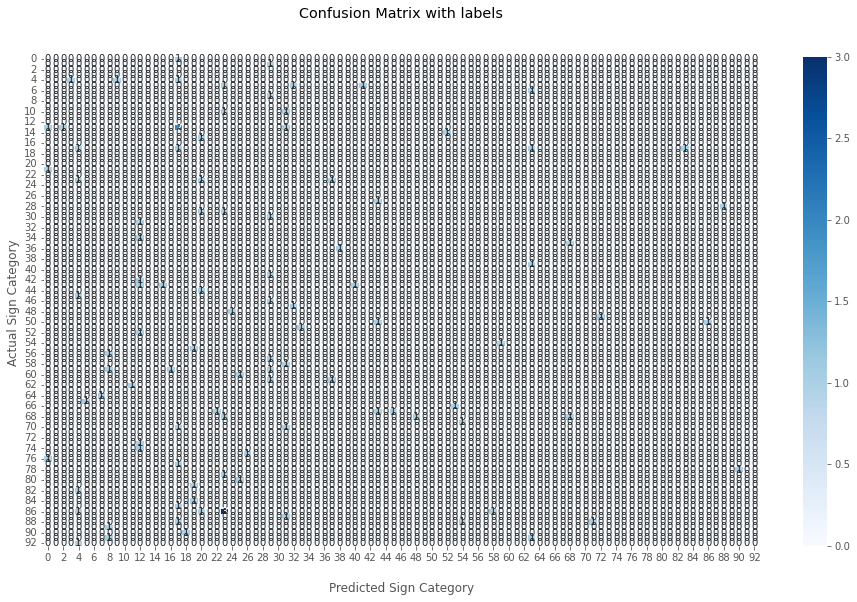

In [175]:
n_neighbors_PC6_10_10inst_alldataset = 5
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [176]:
PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)

dic = {}
for i in range(60):
    x = list(PCA_6components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
		
dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_13044\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_13044\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_13044\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_a

{'feature_803': 1,
 'feature_933': 1,
 'feature_673': 1,
 'feature_1063': 1,
 'feature_543': 1,
 'feature_1193': 1,
 'feature_413': 1,
 'feature_283': 1,
 'feature_153': 1,
 'feature_23': 1,
 'feature_690': 1,
 'feature_560': 1,
 'feature_820': 1,
 'feature_694': 1,
 'feature_686': 1,
 'feature_824': 1,
 'feature_564': 1,
 'feature_556': 1,
 'feature_816': 1,
 'feature_950': 1,
 'feature_680': 1,
 'feature_940': 1,
 'feature_810': 1,
 'feature_944': 1,
 'feature_814': 1,
 'feature_550': 1,
 'feature_684': 1,
 'feature_1070': 1,
 'feature_952': 1,
 'feature_822': 1,
 'feature_532': 1,
 'feature_662': 1,
 'feature_530': 1,
 'feature_660': 1,
 'feature_402': 1,
 'feature_792': 1,
 'feature_528': 1,
 'feature_400': 1,
 'feature_658': 1,
 'feature_790': 1,
 'feature_357': 1,
 'feature_355': 1,
 'feature_353': 1,
 'feature_359': 1,
 'feature_373': 1,
 'feature_363': 1,
 'feature_361': 1,
 'feature_371': 1,
 'feature_365': 1,
 'feature_367': 1,
 'feature_521': 1,
 'feature_523': 1,
 'feature_

# At least 50 % of recognized fingers

In [177]:
df = pd.read_csv("C:/PSL_KNN/data_10_frames_10_instances_with_fingers_shaping.csv")

df['classes'] = df['videoname'].apply(lambda x: x.split('_')[0])
df['number'] = df['videoname'].apply(lambda x: x.split('_')[1])

n_uniq_videos = df['videoname'].nunique()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/PSL_KNN/data_10_frames_10_instances_with_fingers_shaping.csv'

In [ ]:
df

,videoname,n_frame,n_landmark,x,y,class,number,have_landmarks?,all_frames?,n_frames,n_instances,instance_to_use?,valid_frame?,classes
0,aprender_175,0,0,0.495806,0.201817,aprender,175,True,True,17,10,True,True,aprender
1,aprender_175,0,1,0.523832,0.167673,aprender,175,True,True,17,10,True,True,aprender
2,aprender_175,0,2,0.543781,0.169565,aprender,175,True,True,17,10,True,True,aprender
3,aprender_175,0,3,0.561008,0.171631,aprender,175,True,True,17,10,True,True,aprender
4,aprender_175,0,4,0.480482,0.162782,aprender,175,True,True,17,10,True,True,aprender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112495,tú_778,10,70,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú
112496,tú_778,10,71,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú
112497,tú_778,10,72,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú
112498,tú_778,10,73,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú


In [ ]:
#df = pd.DataFrame(df, columns=['videoname', 'n_frame', 'n_landmark'])

In [ ]:
#new_dataframe = df.groupby(['videoname'])

In [ ]:
#new_dataframe

In [ ]:
#new_dataframe.to_frame()

In [ ]:
#Number of unique videos
n_uniq_videos 

150

In [ ]:
#Counting the numbers of frames withouth fingers landmarks per video

#COMMENT THE LOGIC 

#Wer'e elimitating those that don't have at least 1 point
#Also, we're considering just 1 filter, x should be 1. We are not considering y=1 because if the joint does not have x axis, it will not have the y-axis either
#Finally, we're grouping by videoname, so this metric means: for "aprend_175" video, we have 42 frames that have at least 1 joint with with a column x that is equal to zero

frames_without_fingers_video = df.groupby(['videoname']).apply(lambda x: x[x['x'] == 1]['n_frame'].count())
frames_without_fingers_video


videoname
aprender_175     42
aprender_18     126
aprender_195     63
aprender_217     42
aprender_27     147
               ... 
yo_164            0
yo_193           21
yo_235            0
yo_237            0
yo_3             84
Length: 150, dtype: int64

In [ ]:
df_videos = df.loc[(df.x==1)&(df.y==1),:].groupby(['videoname']).n_frame.nunique().reset_index()
#Validate just 10 frames per video
new_df = df.groupby(['videoname']).n_frame.nunique().reset_index()
new_df 

,videoname,n_frame
0,aprender_175,10
1,aprender_18,10
2,aprender_195,10
3,aprender_217,10
4,aprender_27,10
...,...,...
145,yo_164,10
146,yo_193,10
147,yo_235,10
148,yo_237,10


In [ ]:
df_videos.rename(columns = {'n_frame' : 'n_frame_no_recuperados'}, inplace = True)
new_df.rename(columns = {'n_frame' : 'n_frame_total'}, inplace = True)

df_merge = new_df.merge(df_videos, how = 'left', on = 'videoname')

df_merge

,videoname,n_frame_total,n_frame_no_recuperados
0,aprender_175,10,2.0
1,aprender_18,10,6.0
2,aprender_195,10,3.0
3,aprender_217,10,2.0
4,aprender_27,10,6.0
...,...,...,...
145,yo_164,10,NaN
146,yo_193,10,1.0
147,yo_235,10,NaN
148,yo_237,10,NaN


In [ ]:
#Number of videos with and without fingers
df_merge['videoname'].count()


150

In [ ]:
#Number of videos without fingers
df_merge['n_frame_no_recuperados'].count()

123

In [ ]:
# TOTAL (SUM) OF NOT RECOVERED FRAMES PER VIDEO
df_merge['n_frame_no_recuperados'].sum()

472.0

In [ ]:
df_merge["porcentaje_no_recuperados"] = df_merge['n_frame_no_recuperados'] / df_merge['n_frame_total']

#Average of frames without fingers among all the videos
# TOTAL OF NOT RECOVERED FRAMES PER VIDEO : 472
# Number of videos without fingers: 123

#average of percentage on each video -> 150 videos

#123 / 472 = 26%

mean_frames_without_fingers = df_merge['n_frame_no_recuperados'].count() / df_merge['n_frame_no_recuperados'].sum()
mean_frames_without_fingers

0.2605932203389831

In [ ]:
df_merge

,videoname,n_frame_total,n_frame_no_recuperados,porcentaje_no_recuperados
0,aprender_175,10,2.0,0.2
1,aprender_18,10,6.0,0.6
2,aprender_195,10,3.0,0.3
3,aprender_217,10,2.0,0.2
4,aprender_27,10,6.0,0.6
...,...,...,...,...
145,yo_164,10,NaN,NaN
146,yo_193,10,1.0,0.1
147,yo_235,10,NaN,NaN
148,yo_237,10,NaN,NaN


In [ ]:
temp_1 = df_merge['porcentaje_no_recuperados'] >= 0.5

temp_2 = temp_1.to_frame()
temp_2.loc[:,["porcentaje_no_recuperados"]]


,porcentaje_no_recuperados
0,False
1,True
2,False
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [ ]:
temp_2.rename(columns = {'porcentaje_no_recuperados':'boolean_porcentaje_no_recuperados'}, inplace = True)

In [ ]:
temp_2

,boolean_porcentaje_no_recuperados
0,False
1,True
2,False
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [ ]:
#count trues
temp_2.boolean_porcentaje_no_recuperados.value_counts()

AttributeError: 'DataFrame' object has no attribute 'porcentaje_no_recuperados'

In [ ]:
temp_2

,porcentaje_no_recuperados
0,False
1,True
2,False
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [ ]:
df_merge.insert(loc=1, column="boolean_porcentaje_no_recuperados", value=temp_2)


In [ ]:
df_merge.head()

,videoname,boolean_porcentaje_no_recuperados,n_frame_total,n_frame_no_recuperados,porcentaje_no_recuperados
0,aprender_175,False,10,2.0,0.2
1,aprender_18,True,10,6.0,0.6
2,aprender_195,False,10,3.0,0.3
3,aprender_217,False,10,2.0,0.2
4,aprender_27,True,10,6.0,0.6


In [ ]:
df_false = df_merge.loc[(df_merge.boolean_porcentaje_no_recuperados==False)]

In [ ]:
df_videoname = df_false['videoname']

In [ ]:
type(df_merge)

pandas.core.frame.DataFrame

In [ ]:
type(temp_2)

pandas.core.frame.DataFrame

In [ ]:
#df.append(temp_2, ignore_index=True)

In [ ]:
#df.drop(df[df.porcentaje_ < 50].index, inplace=True)

In [ ]:
count_trues = temp_2['porcentaje_no_recuperados'].sum()

In [ ]:
'''
Metrics without fingers% 
1. 25.3% of videos have more than 50% of their frames without the finger joints.
2. 74.7% of videos have more than 50% of their frames with the finger joints.
'''

metrics_without_fingers = count_trues / df_merge['videoname'].count()
metrics_without_fingers

0.25333333333333335

In [ ]:
#GET RID OF THOSE ONES

In [ ]:
#videoname_to_drop = df_videoname.to_list()